In [92]:
# importing packages for data preprocessing and analysis
import pandas as pd  
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [93]:
# load data in notebook
data=pd.read_csv("E:\\backup d rive\\data-science and ai\\DATA-SETS\\mental_health_social_media_dataset.csv")

In [94]:
# first five rows of dataset
data.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [95]:
# Total records and features in dataset 
print("Total no of records:",data.shape[0])
print("Total no of features:",data.shape[1])

Total no of records: 5000
Total no of features: 15


In [96]:
# dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

In [97]:
# drop features not required for predictive analysis 
data.drop(["person_name","date"],axis=1,inplace=True)

In [98]:
# checking for null values in features 
data.isnull().sum()

age                            0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

In [99]:
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'age': array([35, 24, 26, 66, 31, 25, 29, 28, 39, 33, 30, 42, 34, 22, 36, 51, 19,
        63, 13, 64, 67, 17, 40, 23, 32, 16, 50, 21, 38, 53, 43, 20, 65, 45,
        54, 27, 18, 59, 61, 15, 14, 57, 69, 37, 47, 55, 60, 49, 41, 48, 58,
        52, 56, 44, 62, 68, 46]),
 'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'platform': array(['Instagram', 'Snapchat', 'Facebook', 'WhatsApp', 'TikTok',
        'YouTube', 'Twitter'], dtype=object),
 'daily_screen_time_min': array([320, 453, 357, 190, 383, 516, 328, 394, 326, 339, 230, 363, 376,
        387, 223, 500, 456, 349, 362, 375, 493, 266, 219, 449, 162, 355,
        366, 382, 335, 468, 481, 254, 179, 492, 205, 518, 396, 472, 269,
        405, 238, 515, 338, 351, 435, 208, 331, 404, 237, 488, 204, 457,
        494, 398, 330, 354, 427, 391, 467, 180, 444, 517, 329, 340, 497,
        270, 370, 446, 459, 412, 245, 258, 483, 496, 381, 154, 400, 212,
        225, 478, 476, 249, 393, 469, 482, 386, 222, 499, 455, 252, 505,
        4

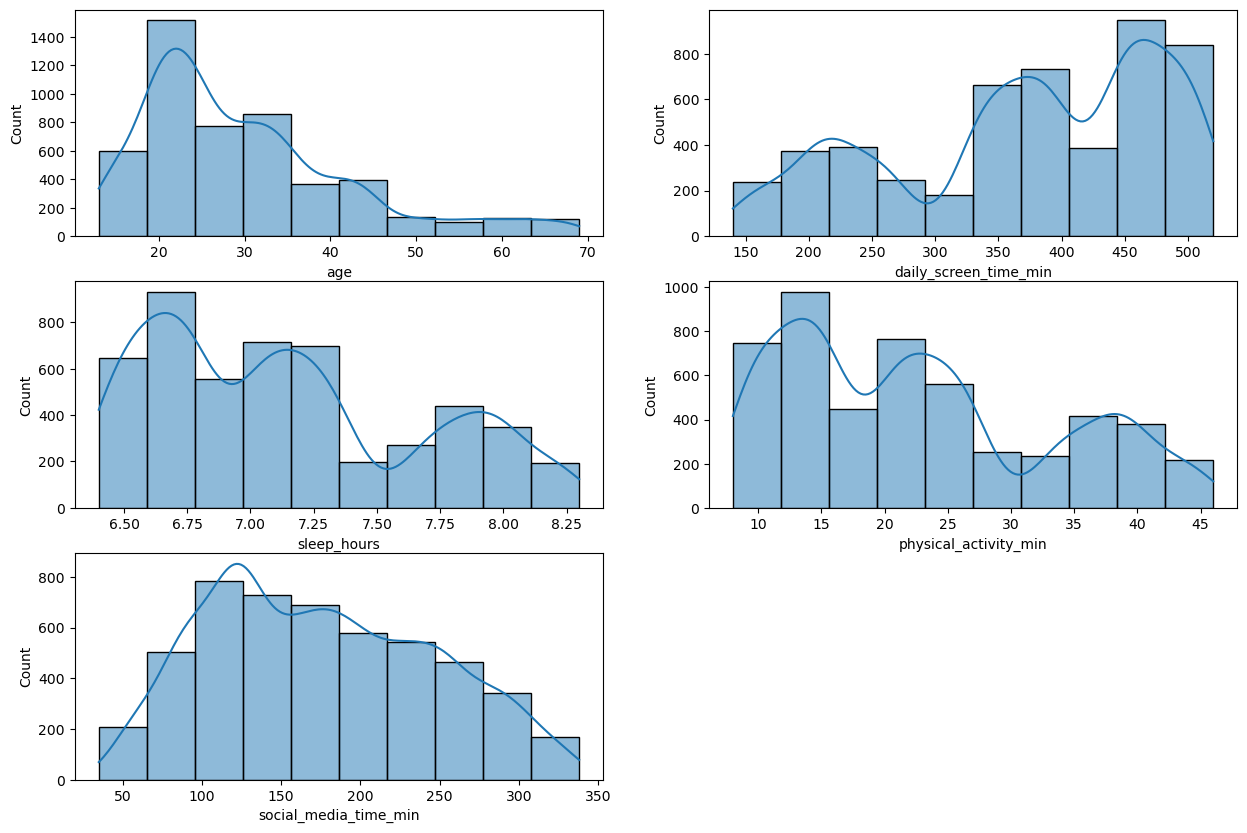

In [100]:
# plotting numeric data 
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.histplot(data["age"],kde=True,bins=10)
plt.subplot(3,2,2)
sns.histplot(data["daily_screen_time_min"],kde=True,bins=10)
plt.subplot(3,2,3)
sns.histplot(data["sleep_hours"],kde=True,bins=10)
plt.subplot(3,2,4)
sns.histplot(data["physical_activity_min"],kde=True,bins=10)
plt.subplot(3,2,5)
sns.histplot(data["social_media_time_min"],kde=True,bins=10)
plt.show()

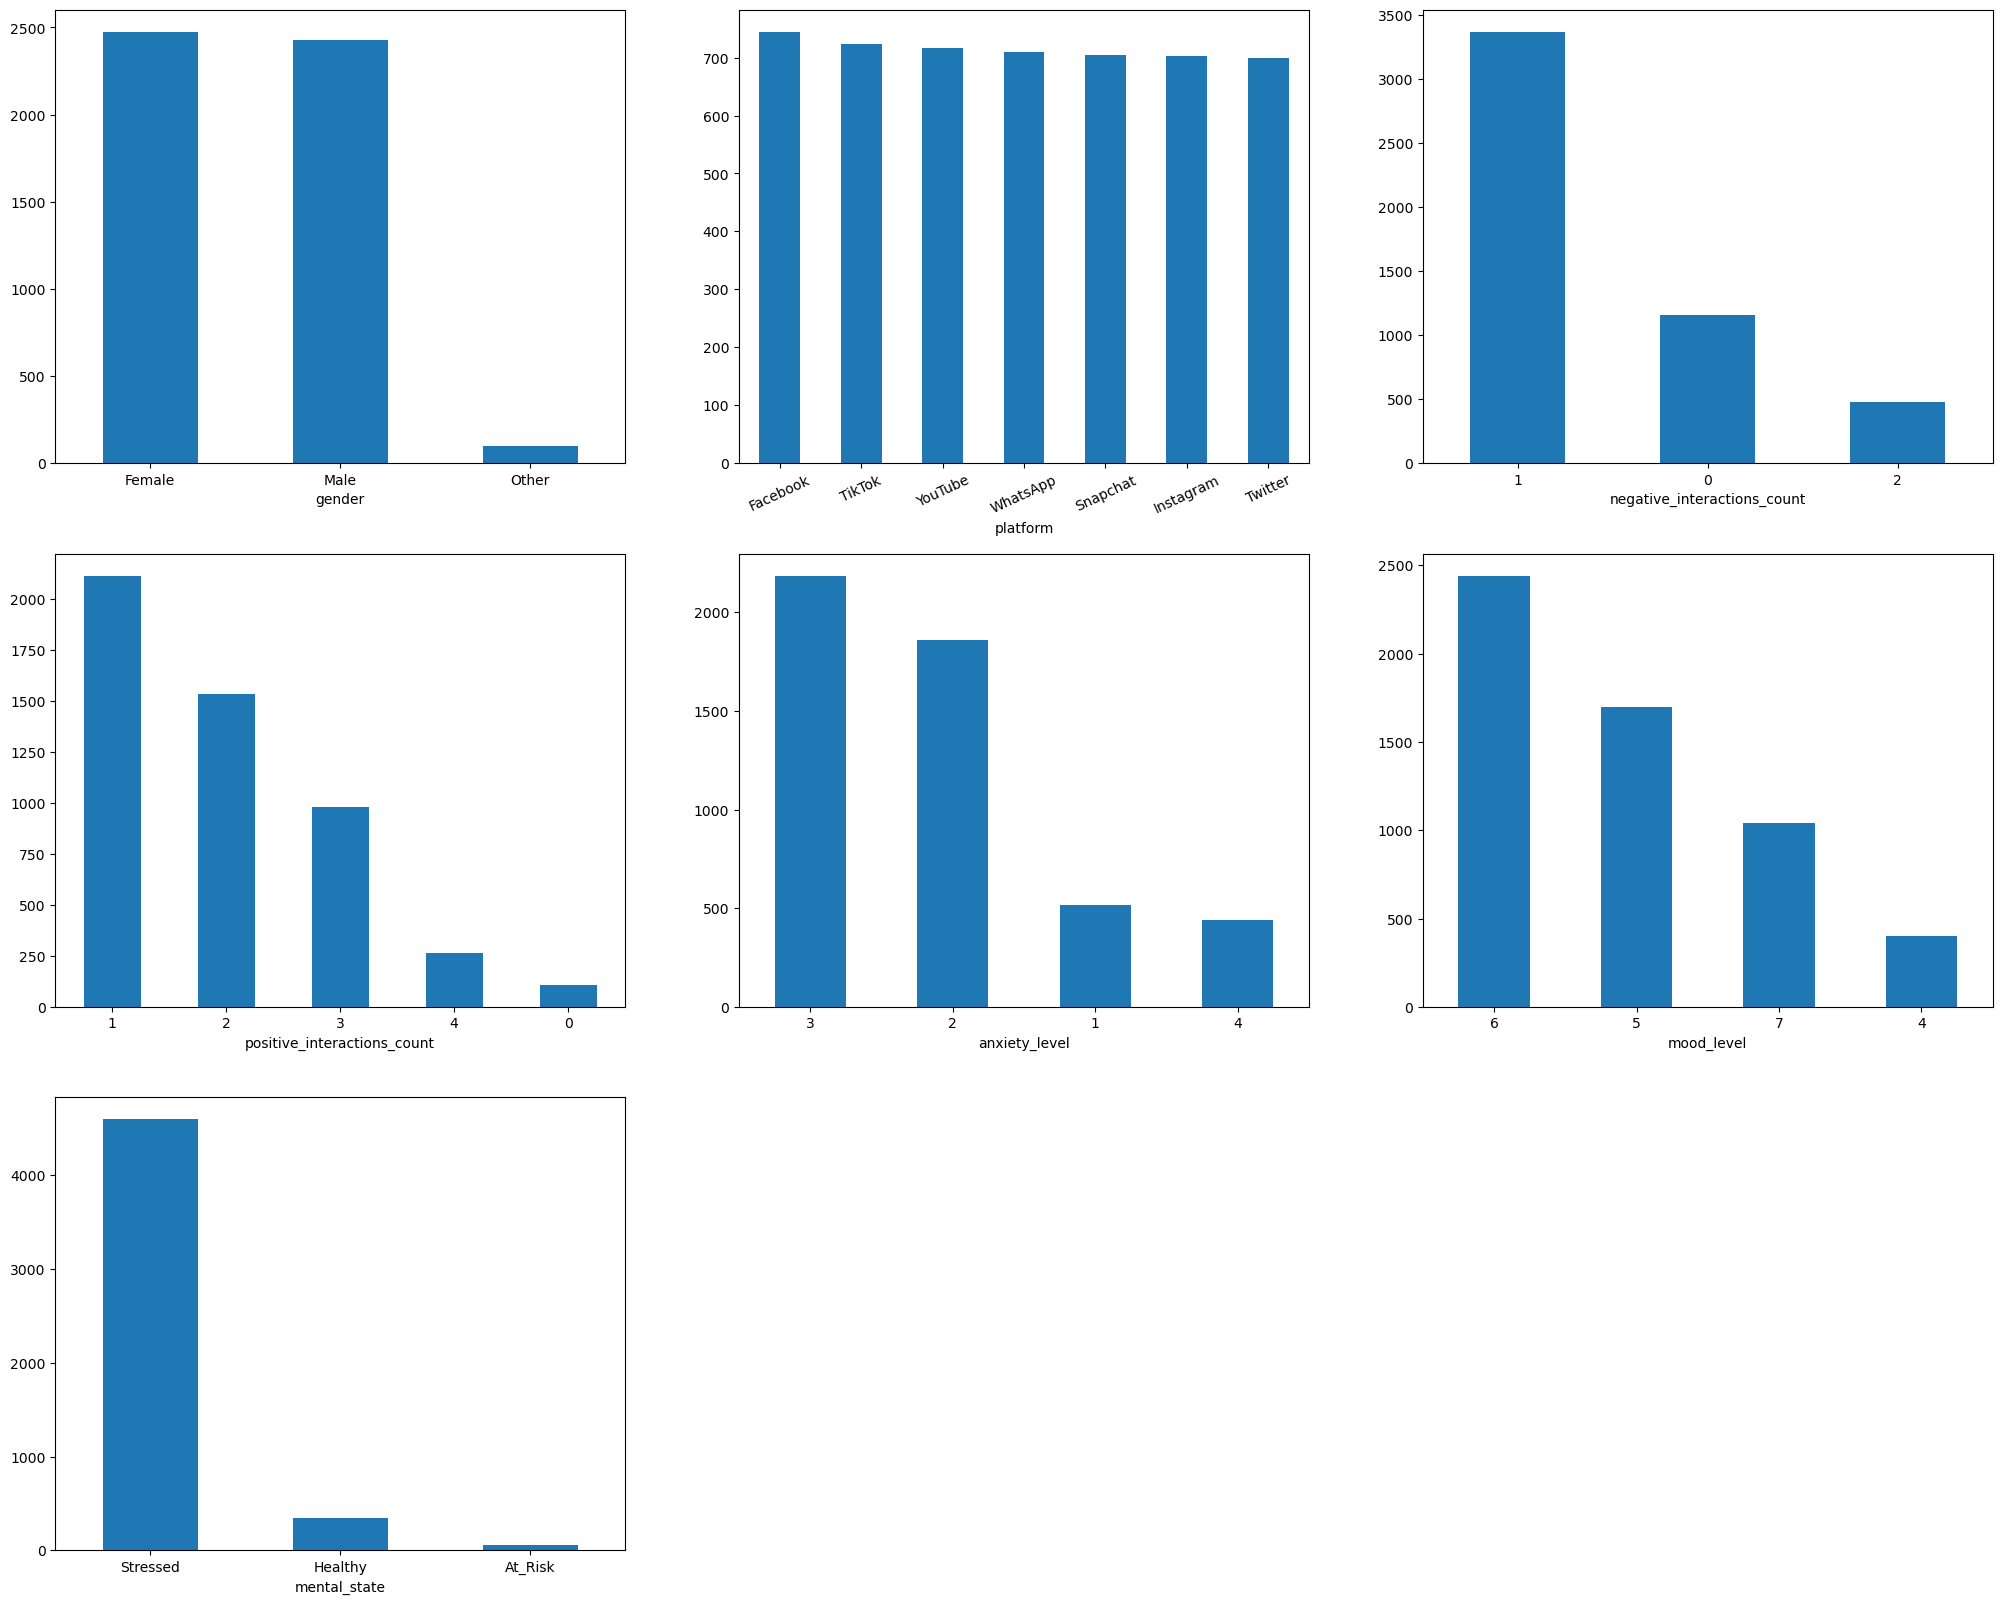

In [101]:
# plotting categorical data 
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
data["gender"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(3,3,2)
data["platform"].value_counts().plot(kind="bar")
plt.xticks(rotation=25)
plt.subplot(3,3,3)
data["negative_interactions_count"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(3,3,4)
data["positive_interactions_count"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(3,3,5)
data["anxiety_level"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(3,3,6)
data["stress_level"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(3,3,6)
data["mood_level"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(3,3,7)
data["mental_state"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

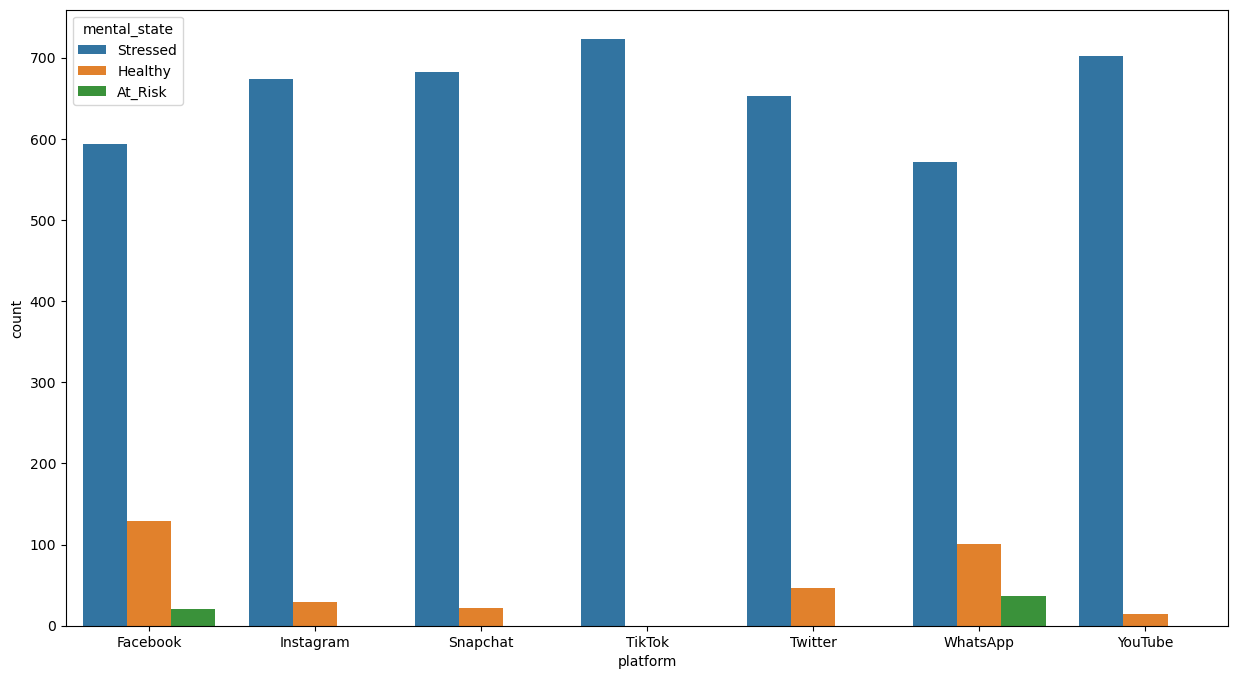

In [102]:
# analysis
platform=data.groupby("platform")["mental_state"].value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(platform,x="platform",y="count",hue="mental_state")
plt.show()

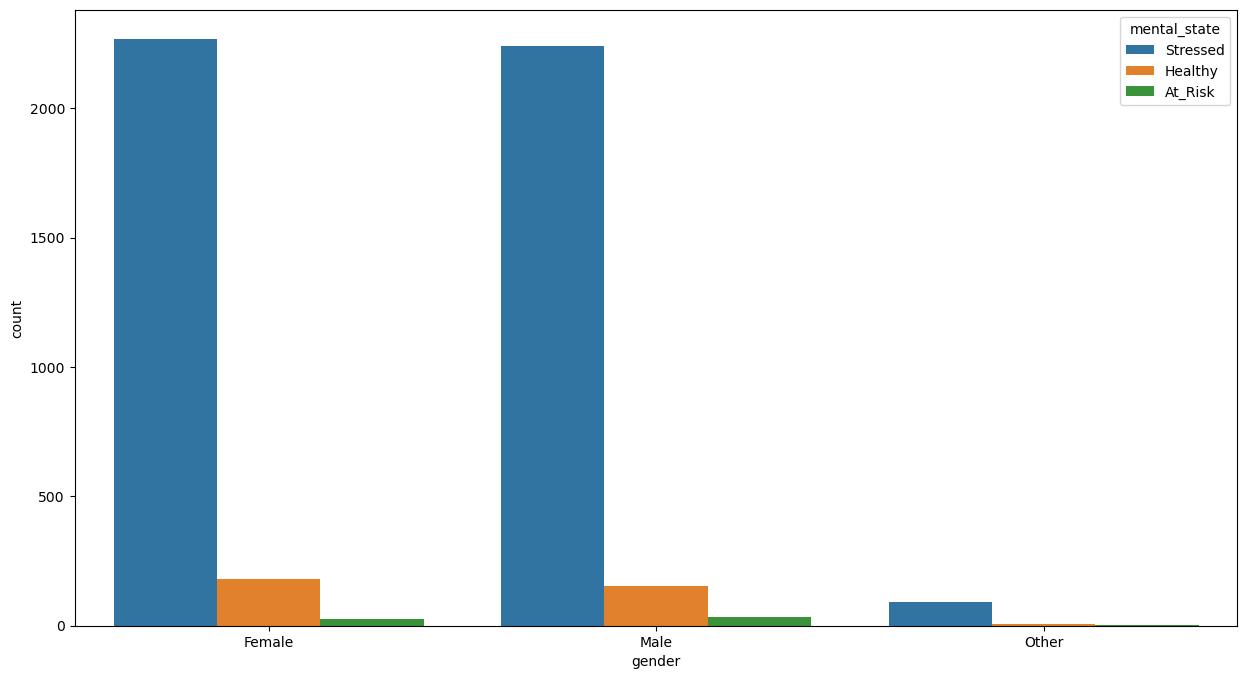

In [103]:
gender=data.groupby("gender")["mental_state"].value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(gender,x="gender",y="count",hue="mental_state")
plt.show()

In [104]:
from sklearn.preprocessing import OneHotEncoder

gender_encode=OneHotEncoder(sparse_output=False)
platform_encode=OneHotEncoder(sparse_output=False) 

In [105]:
data=pd.concat([data.drop(["gender"],axis=1),pd.DataFrame(gender_encode.fit_transform(data[["gender"]]),columns=gender_encode.get_feature_names_out())],axis=1)
data=pd.concat([data.drop(["platform"],axis=1),pd.DataFrame(platform_encode.fit_transform(data[["platform"]]),columns=platform_encode.get_feature_names_out())],axis=1)

In [106]:
data["mental_state"]=data["mental_state"].replace({"Healthy":0,"Stressed":1,"At_Risk":2})

In [107]:
data.head()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state,gender_Female,gender_Male,gender_Other,platform_Facebook,platform_Instagram,platform_Snapchat,platform_TikTok,platform_Twitter,platform_WhatsApp,platform_YouTube
0,35,320,160,1,2,7.4,28,2,7,6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,24,453,226,1,3,6.7,15,3,8,5,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,26,357,196,1,2,7.2,24,3,7,6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,66,190,105,0,1,8.0,41,2,6,6,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,31,383,211,1,2,7.1,22,3,7,6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


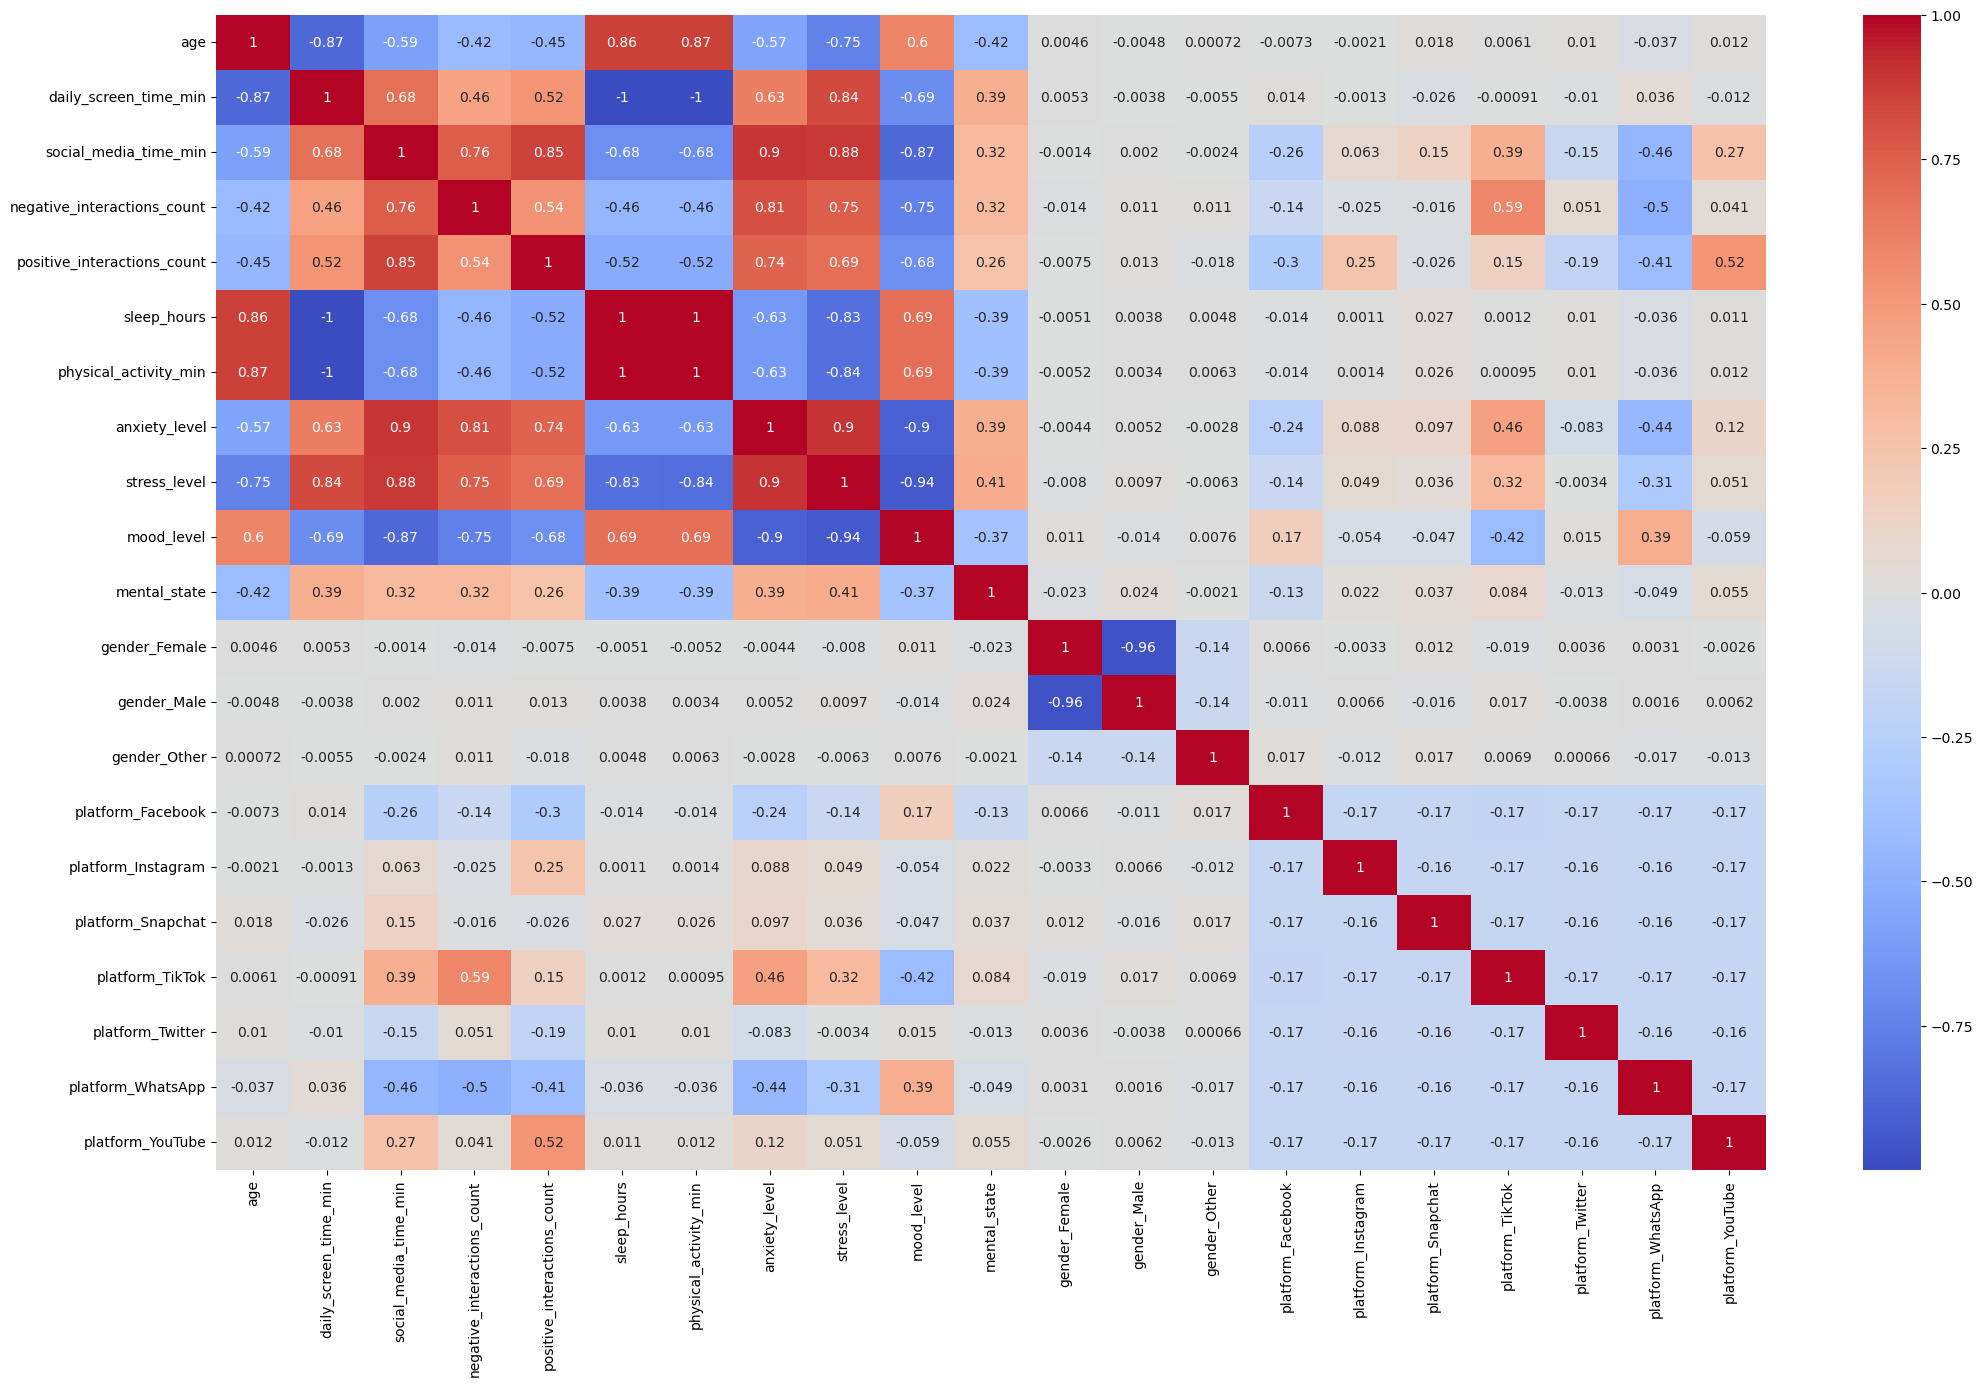

In [108]:
corr=data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [109]:
data.drop(["gender_Female","gender_Male","gender_Other"],axis=1,inplace=True)

In [110]:
x=data.drop(["mental_state"],axis=1)
y=data["mental_state"]

In [111]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(4000, 17)
(4000,)
(1000, 17)
(1000,)


In [113]:
train_y.value_counts()

mental_state
1    3686
0     268
2      46
Name: count, dtype: int64

In [114]:
from imblearn.over_sampling import SMOTE 

sampling=SMOTE(k_neighbors=3) 

sampled_train_x,sampled_train_y=sampling.fit_resample(train_x,train_y)

In [115]:
sampled_train_y.value_counts()

mental_state
1    3686
0    3686
2    3686
Name: count, dtype: int64

In [116]:
from sklearn.preprocessing import StandardScaler 

scale=StandardScaler()

scale_train_x=scale.fit_transform(sampled_train_x)
scale_test_x=scale.transform(test_x)

In [117]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [118]:
models={
    "LogisticRegression":LogisticRegression(), 
    "DecisionTreeClassifier":DecisionTreeClassifier(), 
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(), 
    "GradientBoostingClassifier":GradientBoostingClassifier(), 
    "XGBClassifier":XGBClassifier(), 
    "KNeighborsClassifier":KNeighborsClassifier(), 
    "SVC":SVC()
}

In [119]:
from sklearn.metrics  import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [120]:
def get_metrics(actual,predicted): 
    acc=accuracy_score(actual,predicted)
    cf=confusion_matrix(actual,predicted)
    pr=precision_score(actual,predicted,average="weighted")
    rc=recall_score(actual,predicted,average="weighted")
    f1=f1_score(actual,predicted,average="weighted")
    return acc,cf,pr,rc,f1

In [121]:
for i in range(len(list(models))): 
    model=list(models.values())[i]
    model.fit(scale_train_x,sampled_train_y)

    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)

    train_acc,train_cf,train_pr,train_rc,train_f1=get_metrics(sampled_train_y,train_pred)
    test_acc,test_cf,test_pr,test_rc,test_f1=get_metrics(test_y,test_pred)

    print(list(models.keys())[i])
    print("*"*30)
    print("Training data:")
    print("-"*50)
    print("accuracy score:",train_acc)
    print("confusion matrix:\n",train_cf)
    print("precision score:",train_pr)
    print("recall score:",train_rc)
    print("f1 score:",train_f1)
    print("-"*60)
    print("Testing data:")
    print("-"*50)
    print("accuracy score:",test_acc)
    print("confusion matrix:\n",test_cf)
    print("precision score:",test_pr)
    print("recall score:",test_rc)
    print("f1 score:",test_f1)
    print("="*80)
    print("\n")


LogisticRegression
******************************
Training data:
--------------------------------------------------
accuracy score: 0.9810092240911558
confusion matrix:
 [[3476    0  210]
 [   0 3686    0]
 [   0    0 3686]]
precision score: 0.9820328542094455
recall score: 0.9810092240911558
f1 score: 0.9809938012920415
------------------------------------------------------------
Testing data:
--------------------------------------------------
accuracy score: 0.998
confusion matrix:
 [[ 71   0   2]
 [  0 915   0]
 [  0   0  12]]
precision score: 0.9982857142857143
recall score: 0.998
f1 score: 0.9980630341880342


DecisionTreeClassifier
******************************
Training data:
--------------------------------------------------
accuracy score: 1.0
confusion matrix:
 [[3686    0    0]
 [   0 3686    0]
 [   0    0 3686]]
precision score: 1.0
recall score: 1.0
f1 score: 1.0
------------------------------------------------------------
Testing data:
-----------------------------------

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 

In [124]:
cv=StratifiedKFold()

In [128]:
knn=KNeighborsClassifier()

n_neighbors=[int(x) for x in np.linspace(start=2,stop=10,num=1)]
weights=["uniform", "distance"]
algorithm=["ball_tree","kd_tree"]

params_knn=dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm)

knn_tun=GridSearchCV(estimator=knn,param_grid=params_knn,n_jobs=-1,verbose=3,cv=cv)

knn_tun.fit(scale_train_x,sampled_train_y)

train_pred=knn_tun.predict(scale_train_x)
test_pred=knn_tun.predict(scale_test_x)
train_acc,train_cf,train_pr,train_rc,train_f1=get_metrics(sampled_train_y,train_pred)
test_acc,test_cf,test_pr,test_rc,test_f1=get_metrics(test_y,test_pred)

print("*"*30)
print("Training data:")
print("-"*50)
print("accuracy score:",train_acc)
print("confusion matrix:\n",train_cf)
print("precision score:",train_pr)
print("recall score:",train_rc)
print("f1 score:",train_f1)
print("-"*60)
print("Testing data:")
print("-"*50)
print("accuracy score:",test_acc)
print("confusion matrix:\n",test_cf)
print("precision score:",test_pr)
print("recall score:",test_rc)
print("f1 score:",test_f1)
print("="*80)
print("\n")

print(knn_tun.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
******************************
Training data:
--------------------------------------------------
accuracy score: 0.9999095677337674
confusion matrix:
 [[3686    0    0]
 [   0 3686    0]
 [   1    0 3685]]
precision score: 0.9999095922610975
recall score: 0.9999095677337674
f1 score: 0.9999095677321034
------------------------------------------------------------
Testing data:
--------------------------------------------------
accuracy score: 1.0
confusion matrix:
 [[ 73   0   0]
 [  0 915   0]
 [  0   0  12]]
precision score: 1.0
recall score: 1.0
f1 score: 1.0


{'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'}


In [131]:
svc=SVC() 

C=[0.1, 1, 10, 100] 
kernel=['linear', 'rbf', 'poly'] 
gamma=['scale', 'auto', 0.1, 0.01] 
degree=[2, 3, 4] 
class_weight=[None, 'balanced'] 
decision_function_shape=['ovo', 'ovr'] 


params_svc=dict(C=C,kernel=kernel,gamma=gamma,degree=degree,class_weight=class_weight,decision_function_shape=decision_function_shape)

svc_tun=GridSearchCV(estimator=svc,param_grid=params_svc,n_jobs=-1,verbose=3,cv=cv)

svc_tun.fit(scale_train_x,sampled_train_y)


train_pred=svc_tun.predict(scale_train_x)
test_pred=svc_tun.predict(scale_test_x)

train_acc,train_cf,train_pr,train_rc,train_f1=get_metrics(sampled_train_y,train_pred)
test_acc,test_cf,test_pr,test_rc,test_f1=get_metrics(test_y,test_pred)

print("*"*30)
print("Training data:")
print("-"*50)
print("accuracy score:",train_acc)
print("confusion matrix:\n",train_cf)
print("precision score:",train_pr)
print("recall score:",train_rc)
print("f1 score:",train_f1)
print("-"*60)
print("Testing data:")
print("-"*50)
print("accuracy score:",test_acc)
print("confusion matrix:\n",test_cf)
print("precision score:",test_pr)
print("recall score:",test_rc)
print("f1 score:",test_f1)
print("="*80)
print("\n")
print(svc_tun.best_params_)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
******************************
Training data:
--------------------------------------------------
accuracy score: 0.9990052450714415
confusion matrix:
 [[3675    0   11]
 [   0 3686    0]
 [   0    0 3686]]
precision score: 0.9990082048507798
recall score: 0.9990052450714415
f1 score: 0.9990052428566554
------------------------------------------------------------
Testing data:
--------------------------------------------------
accuracy score: 1.0
confusion matrix:
 [[ 73   0   0]
 [  0 915   0]
 [  0   0  12]]
precision score: 1.0
recall score: 1.0
f1 score: 1.0


{'C': 100, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
